In [2]:
import pandas as pd
import numpy as np

In [ ]:

reviews_df = pd.read_csv("df_with_score.csv")
print(reviews_df.head())

   score                                             review       date
0      1           good rates quick  easy only took minutes 2023-01-31
1      1                  Fast easy service    good prices  2023-12-30
2      1                                      Great service 2022-05-10
3      1  No waiting time to reach a representative  And... 2023-07-18
4      1  We have dealt with snowbird advisor insurance ... 2023-02-04


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return pd.Series([sentiment['pos'], sentiment['neg'], sentiment['neu'], sentiment['compound']])

# Apply sentiment analysis to the 'review_text' column
reviews_df[['pos', 'neg', 'neu', 'compound']] = reviews_df['review'].apply(get_sentiment)

# Preview the updated DataFrame
print(reviews_df.head())

   score                                             review       date    pos  \
0      1           good rates quick  easy only took minutes 2023-01-31  0.537   
1      1                  Fast easy service    good prices  2023-12-30  0.659   
2      1                                      Great service 2022-05-10  0.804   
3      1  No waiting time to reach a representative  And... 2023-07-18  0.256   
4      1  We have dealt with snowbird advisor insurance ... 2023-02-04  0.166   

     neg    neu  compound  
0  0.000  0.463    0.7003  
1  0.000  0.341    0.7003  
2  0.000  0.196    0.6249  
3  0.134  0.610    0.2484  
4  0.065  0.768    0.7897  


In [13]:
reviews_df.to_csv("df_with_score_visualization.csv")

In [8]:
# Extract year and month from the 'date' column
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.to_period('M')  # e.g., '2023-01'

# Group by year/month and calculate the mean compound sentiment score
monthly_sentiment = reviews_df.groupby('month')['compound'].mean().reset_index()
yearly_sentiment = reviews_df.groupby('year')['compound'].mean().reset_index()

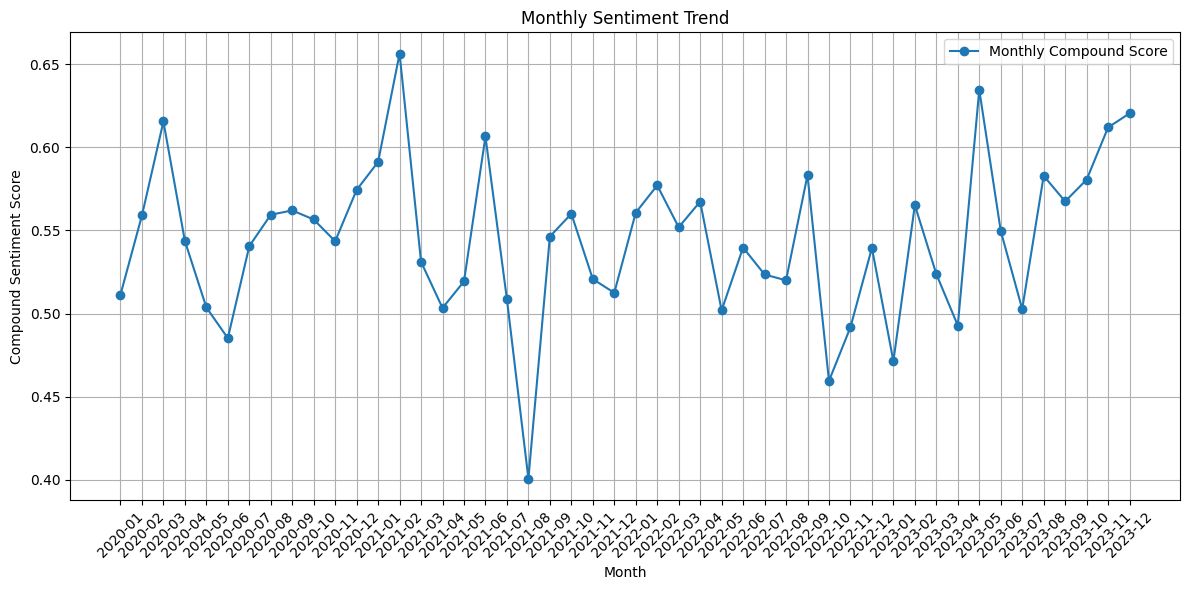

In [9]:
import matplotlib.pyplot as plt

# Plot monthly sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sentiment['month'].astype(str), monthly_sentiment['compound'], marker='o', label='Monthly Compound Score')
plt.title('Monthly Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

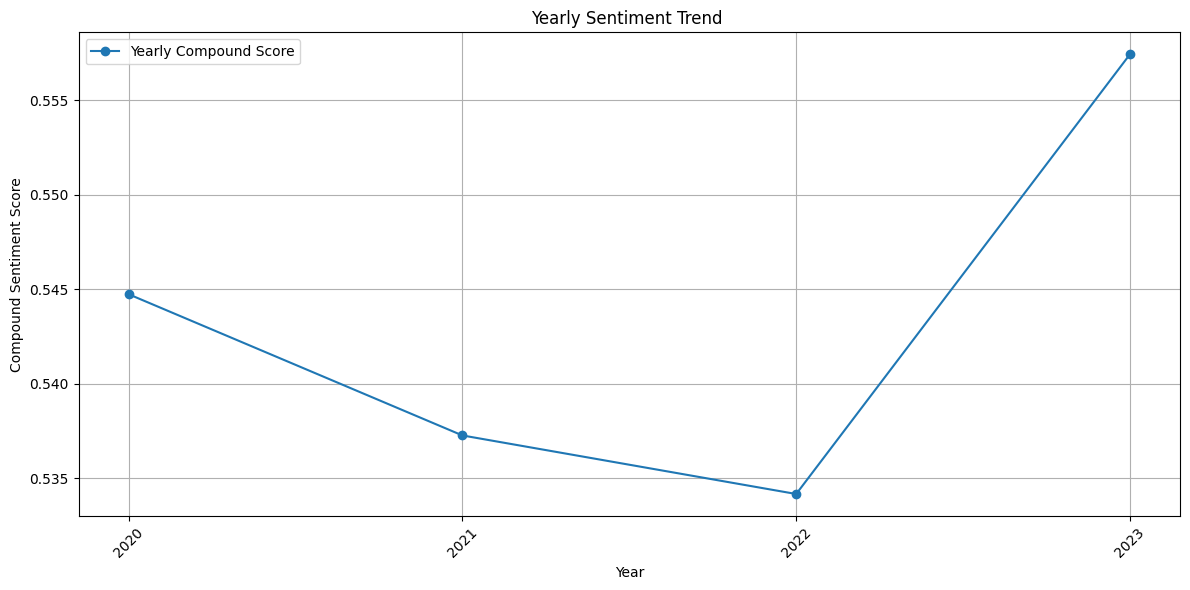

In [11]:
import matplotlib.pyplot as plt

# Plot monthly sentiment trend
plt.figure(figsize=(12, 6))
plt.plot(yearly_sentiment['year'].astype(str), yearly_sentiment['compound'], marker='o', label='Yearly Compound Score')
plt.title('Yearly Sentiment Trend ')
plt.xlabel('Year')
plt.ylabel('Compound Sentiment Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()